# Tragectory of a Basketball - Final Project

## Venessa Ramirez
## Jack Heymach 


In [12]:
import numpy as np

initial_speed = 10.0

initial_angle = 50

initial_height = 2.0

# Distance to backboard in meters
distance_to_backboard = 8

# Hoop height to determine swish

hoop_height = 3

air_constant_over_m = 0.012

g = 9.81

# Simulation time step in seconds
delta_t = 0.035


from math import sin, cos, atan2, sqrt, pi

%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
def vector_components(length, angle_from_horizontal):
    # convert angle from degrees to radians
    angle = angle_from_horizontal * pi / 180.0
    horizontal_component = length * cos(angle)
    vertical_component = length * sin(angle)
    # return both components as a tuple
    return horizontal_component, vertical_component


initial_horizontal_velocity, initial_vertical_velocity = vector_components(initial_speed, initial_angle)
initial_horizontal_velocity, initial_vertical_velocity

(6.427876096865393, 7.66044443118978)

## Getting Angle and Speed

In [15]:
def angle_from_velocity(horizontal_velocity, vertical_velocity):
    angle = atan2(vertical_velocity, horizontal_velocity)  
    # convert radians to degrees
    angle_in_degrees = angle * 180.0 / pi
    # return the result
    return angle_in_degrees

# get speed from components using Pythagorean theorem
def speed_from_velocity(horizontal_velocity, vertical_velocity):
    # pythagorean theorem
    hypotenuse = sqrt(horizontal_velocity**2 + vertical_velocity**2)
    # return the result
    return hypotenuse

speed_from_velocity(sqrt(3.0)/2.0, 0.5)

0.9999999999999999

## Acceleration with Drag

In [16]:
# The function will return a tuple consisting of the horizontal acceleration and the vertical acceleration.
def acceleration_with_drag(horizontal_velocity, vertical_velocity):
    angle = angle_from_velocity(horizontal_velocity, vertical_velocity)
    speed = speed_from_velocity(horizontal_velocity, vertical_velocity)
    strength_of_drag = air_constant_over_m * speed**2
    direction_of_drag = angle + 180
    horizontal_component, vertical_component = vector_components(strength_of_drag, direction_of_drag)
    return horizontal_component, vertical_component - g

acceleration_with_drag(32.16, 21.85)

(-15.004736850919702, -20.004449632854342)

## The Swish Function

In [17]:
hoop_x_left = distance_to_backboard - 0.7
hoop_x_right = hoop_x_left + 0.5
hoop_x_center = (hoop_x_left + hoop_x_right) / 2.0

fudge = 0.15 # amount above or below hoop we will count as going in for a swish
hoop_height = 3

def swish(x_position, y_position):
    if hoop_x_left < x_position < hoop_x_right and \
        hoop_height - fudge < y_position < hoop_height + fudge:
        return True
    else:
        # No swish
        return False
    

## The While Loop That Does the Work


In [18]:
# Initialize the x and y velocities
x_velocities = [initial_horizontal_velocity]
y_velocities = [initial_vertical_velocity]
# Initialize the x and y positions
x_positions = [0.0]
y_positions = [initial_height]
# Initialize the times
times = [0.0]

while y_positions[-1] > 0 and len(times) < 100:
    #
    # get all the before values
    #
    # velocities
    before_x_velocity = x_velocities[-1]
    before_y_velocity = y_velocities[-1]
    # positions
    before_x_position = x_positions[-1]
    before_y_position = y_positions[-1]
    # time
    before_time = times[-1]
    #
    # use the new acceleration_with_drag function to get the accelerations
    #
    x_acceleration, y_acceleration = acceleration_with_drag(before_x_velocity, before_y_velocity)
    #
    # bog-standard Euler update code -- in two dimensions
    #
    # update the x and y velocities
    after_x_velocity = before_x_velocity + delta_t * x_acceleration
    after_y_velocity = before_y_velocity + delta_t * y_acceleration
    # update the x and y positions
    after_x_position = before_x_position + delta_t * before_x_velocity
    after_y_position = before_y_position + delta_t * before_y_velocity
    
    if after_x_position > distance_to_backboard:
        # turn the ball around!
        distance_past_backboard = after_x_position - distance_to_backboard
        after_x_position = distance_to_backboard - distance_past_backboard
        after_x_velocity = -1.0 * after_x_velocity
        
    # Muah-ha-ha -- that's enought to do a reflection -- now see if we've swished
    if swish(after_x_position, after_y_position):
        after_x_position = hoop_x_center
        after_x_velocity = 0.0
        after_y_velocity = -0.2
    
    # update time
    after_time = before_time + delta_t
    #
    # append all the after values to their lists
    #
    x_velocities.append(after_x_velocity)
    y_velocities.append(after_y_velocity)
    x_positions.append(after_x_position)
    y_positions.append(after_y_position)
    times.append(after_time)


## Graphs


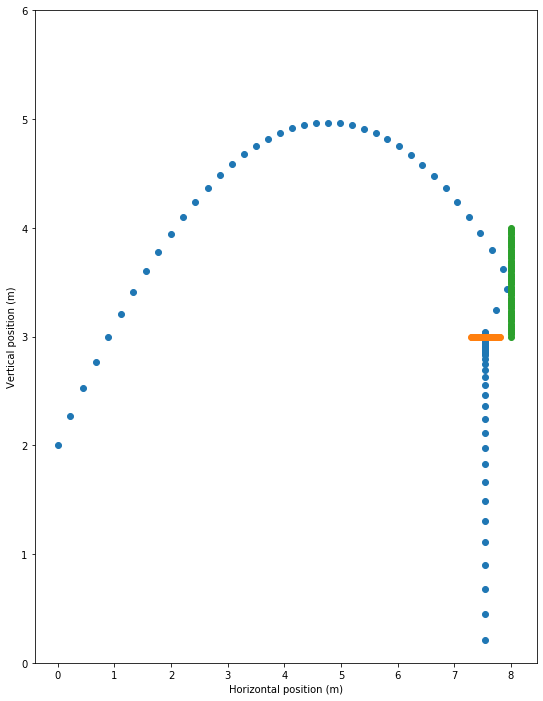

In [19]:

plt.figure(figsize=(9, 12))

plt.scatter(x_positions, y_positions)

# draw in the hoop

hoop_xs = np.ndarray((51,))
hoop_ys = np.ndarray((51,))

for i in range(0, 51):
    hoop_xs[i] = hoop_x_left + 0.5 * i / 50
    hoop_ys[i] = hoop_height

plt.scatter(hoop_xs, hoop_ys)

# draw in backboard 

backboard_xs = np.ndarray((51,))
backboard_ys = np.ndarray((51,))

for i in range(0, 51):
    backboard_xs[i] = distance_to_backboard
    backboard_ys[i] = hoop_height + 1.0 * i / 50
    
plt.scatter(backboard_xs, backboard_ys)

plt.ylim((0, 6))

plt.xlabel("Horizontal position (m)")
plt.ylabel("Vertical position (m)")




plt.show()

# RIP KOBE